In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns


train_data_path = '/home/s4lm_xi/AI/DL/02-CNN/Datasets/Fruit-Dataset/data/train_zip/train'


In [3]:

dest_path_apple = os.path.join(train_data_path, 'apple')
dest_path_banana = os.path.join(train_data_path, 'banana')
dest_path_mixed = os.path.join(train_data_path, 'mixed')
dest_path_orange = os.path.join(train_data_path, 'orange')

for file in os.listdir(train_data_path):
    if file.split('_')[0] == 'apple':
        shutil.move(os.path.join(train_data_path, file), dest_path_apple)
    elif file.split('_')[0] == 'banana':
        shutil.move(os.path.join(train_data_path, file), dest_path_banana)
    elif file.split('_')[0] == 'mixed':
        shutil.move(os.path.join(train_data_path, file), dest_path_mixed)
    elif file.split('_')[0] == 'orange':
        shutil.move(os.path.join(train_data_path, file), dest_path_orange)

In [4]:
test_data_path = '/home/s4lm_xi/AI/DL/02-CNN/Datasets/Fruit-Dataset/data/test_zip/test'

dest_path_apple = os.path.join(test_data_path, 'apple')
dest_path_banana = os.path.join(test_data_path, 'banana')
dest_path_mixed = os.path.join(test_data_path, 'mixed')
dest_path_orange = os.path.join(test_data_path, 'orange')

for file in os.listdir(test_data_path):
    if file.split('_')[0] == 'apple':
        shutil.move(os.path.join(test_data_path, file), dest_path_apple)
    elif file.split('_')[0] == 'banana':
        shutil.move(os.path.join(test_data_path, file), dest_path_banana)
    elif file.split('_')[0] == 'mixed':
        shutil.move(os.path.join(test_data_path, file), dest_path_mixed)
    elif file.split('_')[0] == 'orange':
        shutil.move(os.path.join(test_data_path, file), dest_path_orange)

In [5]:
train_generator = ImageDataGenerator(rescale=1./255, zoom_range=0.3, shear_range=0.2,
                                    horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1./255)

training_set = train_generator.flow_from_directory(train_data_path, target_size=(128,128),
                                                 batch_size=32, )

testing_set = test_generator.flow_from_directory(test_data_path, target_size=(128,128))

Found 240 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [6]:
rl = ReduceLROnPlateau(monitor='val_loss', verbose=1, cooldown=3)

In [10]:
model = Sequential()

model.add(Conv2D(32, input_shape=[128,128,3], kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_set, validation_data=testing_set, epochs=25, callbacks=[rl])

Epoch 1/25
8/8 [==============================] - 8s 978ms/step - loss: 12.6666 - accuracy: 0.3292 - val_loss: 1.4287 - val_accuracy: 0.3167
Epoch 2/25
8/8 [==============================] - 7s 885ms/step - loss: 2.3510 - accuracy: 0.3292 - val_loss: 1.6052 - val_accuracy: 0.3000
Epoch 3/25
8/8 [==============================] - 7s 852ms/step - loss: 1.3631 - accuracy: 0.3667 - val_loss: 1.5530 - val_accuracy: 0.3000
Epoch 4/25
8/8 [==============================] - 6s 811ms/step - loss: 1.2390 - accuracy: 0.4333 - val_loss: 1.5133 - val_accuracy: 0.5167
Epoch 5/25
8/8 [==============================] - 7s 871ms/step - loss: 1.0722 - accuracy: 0.6708 - val_loss: 1.4089 - val_accuracy: 0.6333
Epoch 6/25
8/8 [==============================] - 7s 865ms/step - loss: 0.8095 - accuracy: 0.7625 - val_loss: 1.0714 - val_accuracy: 0.6667
Epoch 7/25
8/8 [==============================] - 7s 873ms/step - loss: 0.5911 - accuracy: 0.7667 - val_loss: 0.9556 - val_accuracy: 0.6500
Epoch 8/25
8/8 [===

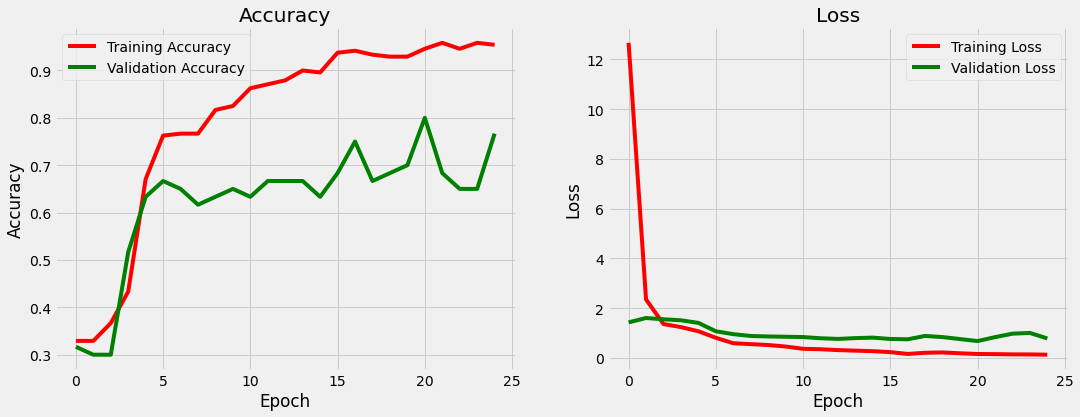

In [18]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(25,20))
plt.subplot(331)
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(332)
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()